In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name())

<font color=gold>↓ [PPT page.01]</font>

**실버 고객의 중요성 및 마케팅 방향 설정**  

- 서울연구원, 2014년 2월 호, <新실버세대를 위한 젊은 비즈니스>, https://www.si.re.kr/node/48461

“세시봉 콘서트”, “조용필 콘서트”, “이문세 콘서트”에 참석한 중년관객들, ‘7번방의 선물’, ‘광해, 왕이 된 남자’ 등 영화분야에 나타난 50대의 막강해진 티켓파워, “꽃보다 할배”로 인한 노년층의 여행수요 등 과거 소비의 소외층으로 간주되었던 중·고령층들이 점차 소비의 주류층으로 이동하고 있다.

특히 주목할 것은 우리나라 고령화시대를 주도하게 될 베이비부머세대가 2012년 현재 우리나라 총인구 4명 중 1명을 차지할 만큼 큰 규모를 이루고 있을 뿐만 아니라 `자산이나 소득규모에 있어서도 현재의 고령층과는 구별되는 소비여력`을 가지고 있어 새로운 비즈니스의 수요층으로 부상하고 있다는 것이다. 최근 자료에 의하면 노후준비에 있어서도 베이비부머세대는 현재 고령층에 비해 상대적으로 양호한 노후준비를 하고 있는 것으로 조사되었다.  

베이비부머의 신(新)비즈니스 모델들은 소비층의 `다양한 건강상태, 소득수준 및 소비욕구를 반영`한 큰 그림이며, 실제적으로 실버산업 소비자는 다양한 소비욕구를 가진 다양한 계층의 집합체임을 잊어서는 안 된다.

## <목차>
- [1. 데이터 전처리](#1.-데이터-전처리)  
- [2. Food](#2.-Food)
    - [2-1. Clustering (K-Means)](#2-1.-Clustering-(K-Means))  
    - [2-2. 건강식품](#2-2.-건강식품)
- [3. Nofood](#3.-Nofood)
    - [3-1. RFM 분석](#3-1.-RFM-분석)
    - [3-2. 의류잡화](#3-2.-의류잡화)
        - [3-2-1. 주얼리](#3-2-1.-주얼리)
        - [3-2-2. 캐주얼](#3-2-2.-캐주얼)
    - [3-3. 가전제품](#3-3.-가전제품)
        - [3-3-1. 결혼 시기와 연관](#3-3-1.-결혼-시기와-연관)
        - [3-3-2. 가을 & 주방가전](#3-3-2.-가을-&-주방가전)

# 1. 데이터 전처리
- `Demo.csv`, `구매내역정보.csv` 합친 `df`
- 분석에 필요한 열 추가 및 변경
    - 구매일자 : 구매월, 구매요일, 구매계절, 평일주말
    - 성별 : 남,여로 변경
    - 연령 : 연령대
    - 구매시간 : 영업시간 9시~22시로 설정하여 그 외 시간 변경
- 상품대분류명 기준 : 식품 `food` / 비식품 `nofood` 로 분류

**Demo.csv, 구매내역정보.csv 합친 df**

In [2]:
cs = pd.read_csv('Demo.csv', encoding='cp949', engine='python')
tr = pd.read_csv('구매내역정보.csv', encoding='cp949', engine='python')
df = pd.merge(cs, tr, on='ID')
df.head()

,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
0,478207946,1,84,서울 성동구,가전제품,컴퓨터주변기기,서울 동대문구,20141219,13,1,59000,0
1,478207946,1,84,서울 성동구,가전제품,TV/AV,서울 동대문구,20141031,14,1,106000,0
2,478207946,1,84,서울 성동구,가전제품,주방가전,서울 중구,20140815,15,1,37000,0
3,478207946,1,84,서울 성동구,의류잡화,여성용의류-이너웨어,서울 동대문구,20140322,17,1,118000,0
4,479806984,1,84,서울 서초구,생활잡화,화장품,서울 중구,20140704,12,1,22000,0


<font color=gold>↓ [PPT page.02]</font>

**columns 추가 및 변경**

1. 구매일자 : 구매월, 구매요일, 구매계절, 평일주말

In [3]:
df.구매일자 = df.구매일자.astype(str).astype('datetime64')
df['구매월'] = df.구매일자.dt.month
df['구매요일'] = df.구매일자.apply(lambda x: ['월', '화', '수', '목', '금', '토', '일'][x.weekday()] +'요일')

In [4]:
def season(x):
    if 3 <= x <= 5:
        return '봄'
    elif 6 <= x <= 8:
        return '여름'
    elif 9 <= x <= 11:
        return '가을'
    else:
        return '겨울'
    
df['구매계절'] = df.구매월.apply(season)

In [5]:
df['평일주말'] =  df.구매요일.apply(lambda x : '주말' if x == '토요일' or x == '일요일' else '평일')

2. 성별 : 남, 여로 변경

In [6]:
df['성별'] = df.성별.apply(lambda x: '남' if x == 1 else '여')

3. 연령 : 연령대

In [7]:
df['연령대'] = df.연령.astype('str').str[0]+'0대'

<font color=gold>↓ [PPT page.03]</font>

4. 구매시간 데이터 변경  
- 오프라인 데이터이므로 영업시간 9시~22시로 설정
- 그 외 1시부터 3시는 닫는 시간인 22시(밤)으로, 4시부터 8시는 여는 시간(아침)으로 설정

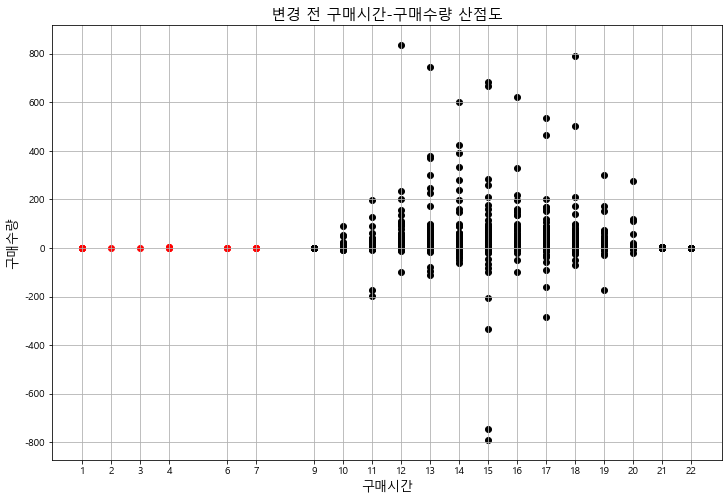

In [8]:
df_target = df.query('1<=구매시간<=7')
df_target0 = df.query('구매시간>=8')

fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(df_target.구매시간, df_target.구매수량, color='red')
plt.scatter(df_target0.구매시간, df_target0.구매수량, color='black')

plt.xlabel('구매시간', size=13)
plt.ylabel('구매수량', size=13)

label = sorted(df.구매시간.value_counts().index)
plt.xticks(label)

plt.grid(True)
plt.title('변경 전 구매시간-구매수량 산점도', size=15)
plt.show()

In [9]:
df['구매시간'] = df.구매시간.apply(lambda x: 9 if 4<=x<=7 else 22 if 1<=x<=3 else x)

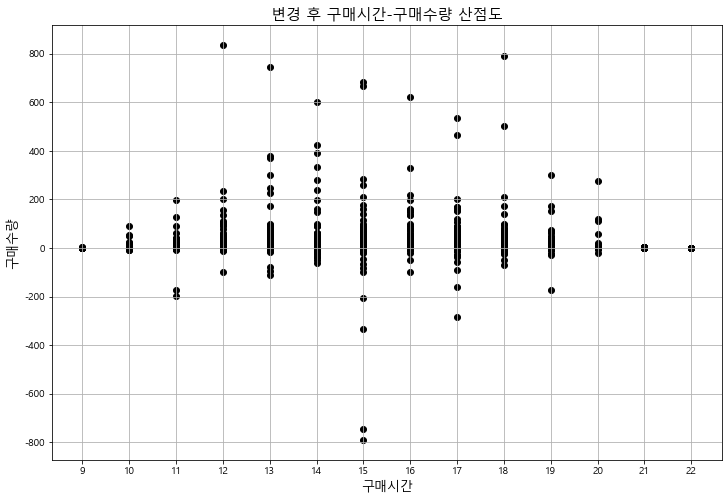

In [10]:
df_target = df.query('1<=구매시간<=7')
df_target0 = df.query('구매시간>=8')

fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(df_target.구매시간, df_target.구매수량, color='red')
plt.scatter(df_target0.구매시간, df_target0.구매수량, color='black')

plt.xlabel('구매시간', size=13)
plt.ylabel('구매수량', size=13)

label = sorted(df.구매시간.value_counts().index)
plt.xticks(label)

plt.grid(True)
plt.title('변경 후 구매시간-구매수량 산점도', size=15)
plt.show()

<font color=gold>↓ [PPT page.04]</font>

**상품대분류명 기준 : 식품 food / 비식품 nofood 로 분류**
- 식품 데이터가 비율이 높기 때문에 이후 분석의 용이함을 위해 따로 분류하여 저장

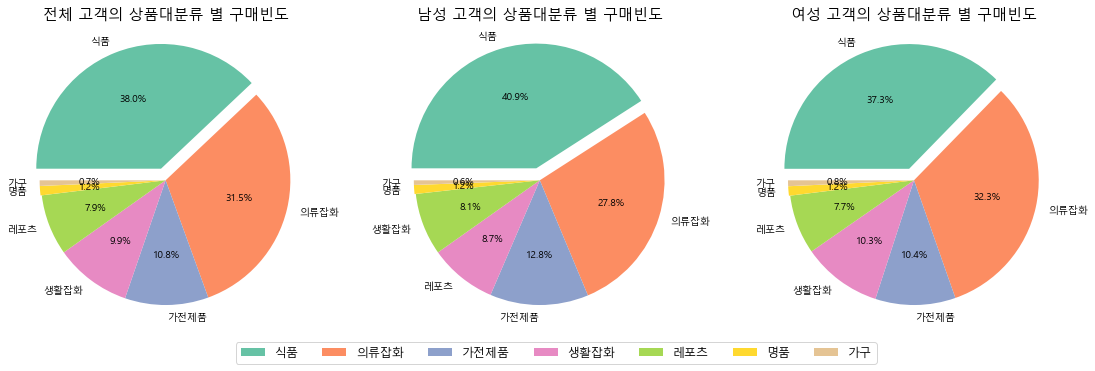

In [11]:
fig, axes = plt.subplots(1,3, figsize=(19,6))
colors_items = matplotlib.cm.get_cmap('Set2')(np.arange(len(df)))

df.상품대분류명.value_counts().plot.pie(ax=axes[0], autopct='%.1f%%', colors=colors_items,
                 explode=(0.1,0,0,0,0,0.01,0.01), startangle=180, counterclock=False)
axes[0].set_title('전체 고객의 상품대분류 별 구매빈도', size=15)
axes[0].set_ylabel('')


df[df['성별'] == '남'].상품대분류명.value_counts().plot.pie(ax=axes[1], autopct='%.1f%%', colors=colors_items,
                 explode=(0.1,0,0,0,0,0.01,0.01), startangle=180,counterclock=False)
axes[1].set_title('남성 고객의 상품대분류 별 구매빈도', size=15)
axes[1].set_ylabel('')

df[df['성별'] == '여'].상품대분류명.value_counts().plot.pie(ax=axes[2], autopct='%.1f%%', colors=colors_items,
                 explode=(0.1,0,0,0,0,0.01,0.01), startangle=180,counterclock=False)
axes[2].set_title('여성 고객의 상품대분류 별 구매빈도', size=15)
axes[2].set_ylabel('')

plt.legend(bbox_to_anchor=(0.4,0), prop={'size': 12}, ncol=7)
plt.show()

In [12]:
food = df.query('상품대분류명 =="식품"')
nofood = df.query('상품대분류명 !="식품"')

# 2. Food

<font color=gold>↓ [PPT page.05]</font>

## 2-1. Clustering (K-Means)

In [13]:
ff = food.groupby('ID')['구매금액'].agg([
    ('총구매액',np.sum), 
    ('구매건수', np.size), 
    ('평균구매액', lambda x: np.round(np.mean(x))),
    ('최대구매액', np.max)]).reset_index()
ff.head()

,ID,총구매액,구매건수,평균구매액,최대구매액
0,741463,196000,2,98000,98000
1,909249,46000,2,23000,41000
2,1065068,87000,4,21750,38000
3,1387032,75000,4,18750,38000
4,1529116,66000,5,13200,23000


In [14]:
def drop_column_level(data):
    c_list = []
    for _, c in data.columns:
        if not c:
            c_list.append(_)
        else:
            c_list.append(c)
    return c_list

In [15]:
f = food.groupby('ID')['상품중분류명'].agg([
    ('구매상품수(중)', lambda x: x.nunique())]).reset_index()
ff = ff.merge(f, how='left')
ff.head()

,ID,총구매액,구매건수,평균구매액,최대구매액,구매상품수(중)
0,741463,196000,2,98000,98000,1
1,909249,46000,2,23000,41000,1
2,1065068,87000,4,21750,38000,3
3,1387032,75000,4,18750,38000,1
4,1529116,66000,5,13200,23000,1


In [16]:
f = food.groupby('ID')['구매일자'].agg([
    ('내점일수',lambda x: x.nunique()),
    ('구매주기', lambda x: int(((x.max() - x.min()).days) / x.nunique())),
    ('주말방문율', lambda x: (x.dt.weekday > 4).mean().round(2))]).reset_index()
ff = ff.merge(f, how='left')
ff.head()

,ID,총구매액,구매건수,평균구매액,최대구매액,구매상품수(중),내점일수,구매주기,주말방문율
0,741463,196000,2,98000,98000,1,2,19,0.0
1,909249,46000,2,23000,41000,1,2,123,0.5
2,1065068,87000,4,21750,38000,3,2,36,0.0
3,1387032,75000,4,18750,38000,1,3,93,0.0
4,1529116,66000,5,13200,23000,1,3,20,0.0


In [17]:
visit_cnt = food.groupby('ID')['성별'].agg(lambda x: x.count())
per_amount = (food.groupby('ID')['구매금액'].sum() / visit_cnt).round(0).reset_index().rename(columns={0:'거래당구매액'})
per_count = (food.groupby('ID')['구매수량'].count() / visit_cnt).round(1).reset_index().rename(columns={0:'거래당구매건수'})
f = pd.merge(per_amount, per_count, on='ID')
ff = ff.merge(f, how='left')
ff.head()

,ID,총구매액,구매건수,평균구매액,최대구매액,구매상품수(중),내점일수,구매주기,주말방문율,거래당구매액,거래당구매건수
0,741463,196000,2,98000,98000,1,2,19,0.0,98000.0,1.0
1,909249,46000,2,23000,41000,1,2,123,0.5,23000.0,1.0
2,1065068,87000,4,21750,38000,3,2,36,0.0,21750.0,1.0
3,1387032,75000,4,18750,38000,1,3,93,0.0,18750.0,1.0
4,1529116,66000,5,13200,23000,1,3,20,0.0,13200.0,1.0


In [18]:
week_to = food.구매일자.max()
week_trans = []
for i in range(10):
    week_from = week_to + pd.DateOffset(weeks=-1)
    week_trans.append(food.query('@week_from < 구매일자 <= @week_to')
                      .groupby('ID')['성별']
                      .agg([(f'w{10-i}', 'count')])
                      .reset_index())
    week_to = week_from

f = pd.DataFrame({'ID': food.ID.unique()})
for w in week_trans[::-1]:
    f = pd.merge(f, w, how='left')
f = f.fillna(0)

f['구매추세'] = f.apply(lambda x: np.polyfit(range(10), x[1:], 1)[0].round(2), axis=1)
ff = ff.merge(f.iloc[:,[0,-1]], how='left')
ff.head()

,ID,총구매액,구매건수,평균구매액,최대구매액,구매상품수(중),내점일수,구매주기,주말방문율,거래당구매액,거래당구매건수,구매추세
0,741463,196000,2,98000,98000,1,2,19,0.0,98000.0,1.0,0.00
1,909249,46000,2,23000,41000,1,2,123,0.5,23000.0,1.0,0.03
2,1065068,87000,4,21750,38000,3,2,36,0.0,21750.0,1.0,0.08
3,1387032,75000,4,18750,38000,1,3,93,0.0,18750.0,1.0,-0.03
4,1529116,66000,5,13200,23000,1,3,20,0.0,13200.0,1.0,-0.03


In [19]:
f = food.groupby('ID')['구매시간'].agg([
    ('주구매시간', lambda x: x.value_counts().index[0])
]).reset_index()
ff = ff.merge(f, how='left')
ff.head()

,ID,총구매액,구매건수,평균구매액,최대구매액,구매상품수(중),내점일수,구매주기,주말방문율,거래당구매액,거래당구매건수,구매추세,주구매시간
0,741463,196000,2,98000,98000,1,2,19,0.0,98000.0,1.0,0.00,11
1,909249,46000,2,23000,41000,1,2,123,0.5,23000.0,1.0,0.03,12
2,1065068,87000,4,21750,38000,3,2,36,0.0,21750.0,1.0,0.08,20
3,1387032,75000,4,18750,38000,1,3,93,0.0,18750.0,1.0,-0.03,13
4,1529116,66000,5,13200,23000,1,3,20,0.0,13200.0,1.0,-0.03,12


In [20]:
food['판매단가'] = food['구매금액'] / food['구매수량']

# 상품별 평균 판매단가에 대한 4분위수 계산 => 3Q 이상을 고가상품으로 설정
price_4q = food.groupby('상품중분류명')['판매단가'].mean().quantile([.25,.5,.75])
price_4q

c:\users\dltnq\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.25     9600.294852
0.50    13618.742260
0.75    23728.742516
Name: 판매단가, dtype: float64

In [21]:
f = (food.groupby('ID')['판매단가']
     .agg([('고가상품구매율', lambda x: (x > price_4q.iloc[2]).mean().round(2))])
     .reset_index())
ff = ff.merge(f, how='left')
ff.head()

,ID,총구매액,구매건수,평균구매액,최대구매액,구매상품수(중),내점일수,구매주기,주말방문율,거래당구매액,거래당구매건수,구매추세,주구매시간,고가상품구매율
0,741463,196000,2,98000,98000,1,2,19,0.0,98000.0,1.0,0.00,11,1.00
1,909249,46000,2,23000,41000,1,2,123,0.5,23000.0,1.0,0.03,12,0.50
2,1065068,87000,4,21750,38000,3,2,36,0.0,21750.0,1.0,0.08,20,0.50
3,1387032,75000,4,18750,38000,1,3,93,0.0,18750.0,1.0,-0.03,13,0.25
4,1529116,66000,5,13200,23000,1,3,20,0.0,13200.0,1.0,-0.03,12,0.00


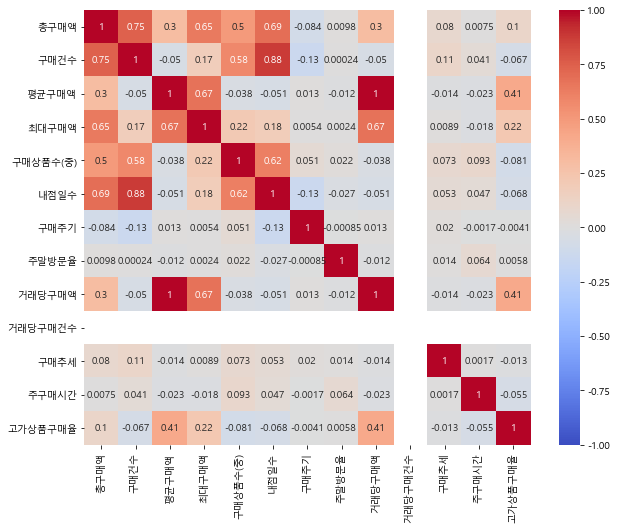

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(ff.iloc[:,1:].corr(), annot=True, cmap="coolwarm", vmin = -1, vmax = 1)
plt.show()

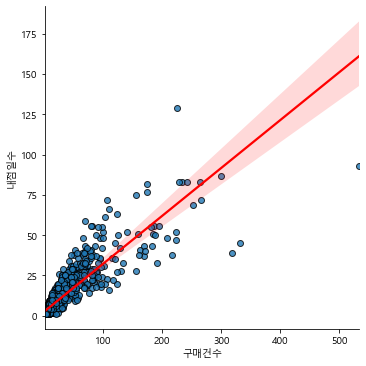

In [23]:
sns.lmplot(x='구매건수', y='내점일수', data=ff, 
           line_kws={'color':'red'}, scatter_kws={'edgecolor':'black'})
plt.show()

In [24]:
ff_norm = ff.iloc[:,1:].apply(lambda x: (x - x.mean()) / x.std(), axis=1) 
ff_norm.head()

,총구매액,구매건수,평균구매액,최대구매액,구매상품수(중),내점일수,구매주기,주말방문율,거래당구매액,거래당구매건수,구매추세,주구매시간,고가상품구매율
0,2.483538,-0.591343,0.946082,0.946082,-0.591358,-0.591343,-0.591076,-0.591374,0.946082,-0.591358,-0.591374,-0.591201,-0.591358
1,2.096365,-0.600312,0.747968,1.803235,-0.600370,-0.600312,-0.593218,-0.600400,0.747968,-0.600370,-0.600427,-0.599726,-0.600400
2,2.908794,-0.509307,0.345100,0.983568,-0.509346,-0.509386,-0.508050,-0.509464,0.345100,-0.509425,-0.509461,-0.508679,-0.509445
3,2.829578,-0.516786,0.319671,1.178617,-0.516920,-0.516830,-0.512815,-0.516964,0.319671,-0.516920,-0.516966,-0.516384,-0.516953
4,3.050158,-0.473927,0.230677,0.753990,-0.474140,-0.474033,-0.473126,-0.474194,0.230677,-0.474140,-0.474195,-0.473553,-0.474194


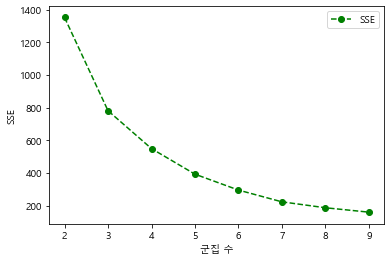

In [25]:
from sklearn.cluster import KMeans

# 군집 수에 따른 SSE(군집내 오차제곱합) 계산
wss = []
sis = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(ff_norm)
    wss = np.append(wss, kmeans.inertia_)
    
    
# 군집 수에 따른 SSE 시각화
fig, ax = plt.subplots()
line = ax.plot(np.arange(2,10), wss, 'go--', label='SSE')
ax.set_ylim(wss.min()*0.55, wss.max()*1.05)
ax.set_xlabel('군집 수')
ax.set_ylabel('SSE')
labels = [l.get_label() for l in line]
plt.legend(line, labels)
plt.show()

In [26]:
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(ff_norm)

KMeans(n_clusters=3, random_state=0)

In [27]:
ff['세그먼트'] = kmeans.labels_
ff.head()

,ID,총구매액,구매건수,평균구매액,최대구매액,구매상품수(중),내점일수,구매주기,주말방문율,거래당구매액,거래당구매건수,구매추세,주구매시간,고가상품구매율,세그먼트
0,741463,196000,2,98000,98000,1,2,19,0.0,98000.0,1.0,0.00,11,1.00,2
1,909249,46000,2,23000,41000,1,2,123,0.5,23000.0,1.0,0.03,12,0.50,2
2,1065068,87000,4,21750,38000,3,2,36,0.0,21750.0,1.0,0.08,20,0.50,2
3,1387032,75000,4,18750,38000,1,3,93,0.0,18750.0,1.0,-0.03,13,0.25,2
4,1529116,66000,5,13200,23000,1,3,20,0.0,13200.0,1.0,-0.03,12,0.00,0


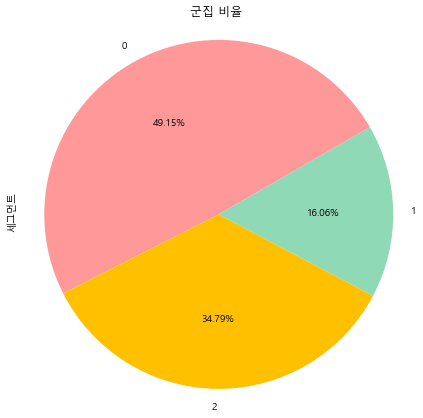

In [28]:
colors = ['#ff9999', '#ffc000', '#8fd9b6']
plt.figure(figsize=(6,6))
ff.세그먼트.value_counts().plot.pie(autopct='%.2f%%', figsize=(7,7), 
                                      startangle=30, legend=False, colors = colors)
plt.title("군집 비율")
plt.axis('equal')
plt.show()

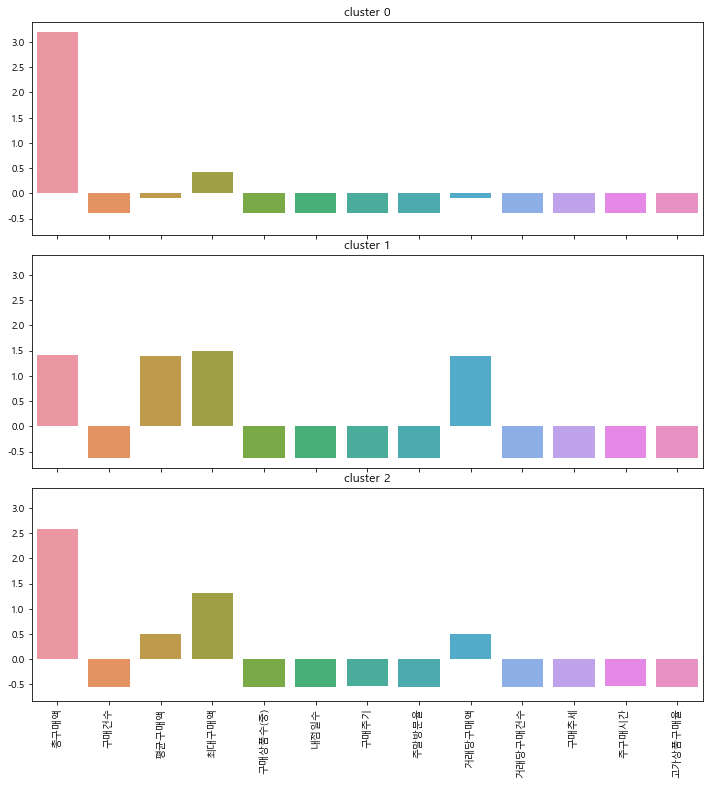

In [29]:
fig, ax = plt.subplots(best_k, 1,  figsize=(10,10), sharex=True, sharey=True)
ax = ax.ravel()
plt.tight_layout()

for i in range(kmeans.n_clusters):
    ax[i].set_title('cluster %d' % i)
    sns.barplot(x=np.arange(ff_norm.columns.size), y=kmeans.cluster_centers_[i], ax=ax[i])
    ax[i].set_xticks(np.arange(ff_norm.columns.size))
    ax[i].set_xticklabels(ff_norm.columns, rotation=90)

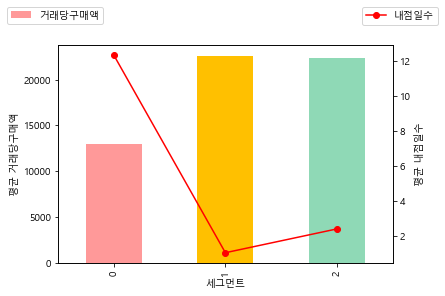

In [30]:
# 클러스터 분석 확인
fig, ax1 = plt.subplots()
ax1 = ff.groupby('세그먼트')['거래당구매액'].mean().plot.bar(color = colors)
ax1.set_ylabel('평균 거래당구매액')
ax1.legend(bbox_to_anchor = (0.15,1.2))

ax2 = ax1.twinx()
ax2 = ff.groupby('세그먼트')['내점일수'].mean().plot(color = 'red', marker = 'o')
ax2.set_ylabel('평균 내점일수')
ax2.legend(bbox_to_anchor = (1.15,1.2))
plt.show()

In [31]:
ff.groupby('세그먼트')['거래당구매액'].mean()

세그먼트
0    12983.144822
1    22645.339109
2    22403.101714
Name: 거래당구매액, dtype: float64

In [32]:
ff.groupby('세그먼트')['내점일수'].mean()

세그먼트
0    12.359223
1     1.012376
2     2.379429
Name: 내점일수, dtype: float64

**클러스터 분석 결과**
1. `클러스터 0` : 총구매액과 내점일수 가장 많지만, 거래당 구매액 낮음 ⇒ 주고객층으로 설정
2. 클러스터 1 : 총구매액과 내점일수 가장 적지만, 거래당 구매액 가장 높음
3. 클러스터 2 : 총구매액과 거래당 구매액 높은 편이고, 내점일수 낮음

_클러스터링 결과 차이_

같은 코드를 실행했을 때, 클러스터링 결과 차이 존재.  
클러스터 0은 같게 나타났지만, 클러스터 1 & 클러스터 2에서 약간의 차이 보임.  
따라서, 클러스터 1 & 클러스터 2는 공통적으로 나타나는 특징인 적은 내점일수와 높은 거래당 구매액에 초점을 맞춰 분석 진행.

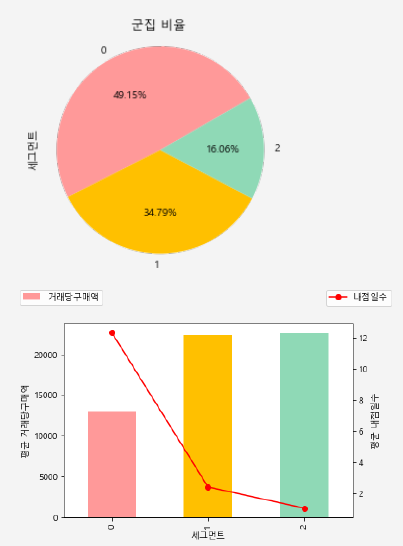

<font color=gold>↓ [PPT page.06]</font>

## 2-2. 건강식품

- 클러스터 1 & 클러스터 2 에서 거래당 구매액 높게 나타나는 이유

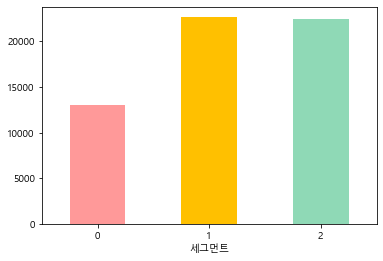

In [33]:
ff.groupby('세그먼트')['거래당구매액'].mean().plot.bar(color = colors)
plt.xticks(rotation = 0)
plt.show()

In [34]:
fff = food.merge(ff[['ID','세그먼트']], on = 'ID')

pd.DataFrame({customers:
              fff[fff['세그먼트'] == customers].상품중분류명.value_counts().head(5).index for customers in fff.세그먼트.unique()})[[0,1,2]]

,0,1,2
0,가공식품,가공식품,가공식품
1,농산물,음료,농산물
2,음료,농산물,음료
3,수산물,수산물,수산물
4,축산물,건강식품,건강식품


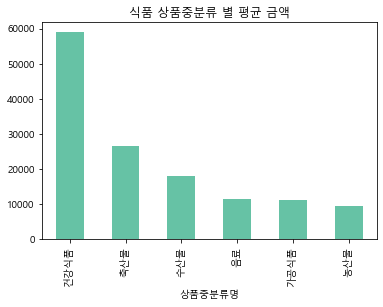

In [35]:
food.groupby('상품중분류명')['구매금액'].mean().sort_values(ascending = False).plot.bar(color = colors_items[0], label = None)
plt.title('식품 상품중분류 별 평균 금액')
plt.show()

# 3. Nofood

<font color=gold>↓ [PPT page.08~09]</font>

## 3-1. RFM 분석

In [36]:
# R
# 최종 구매일 다음날을 기준으로 계산 
now = nofood.구매일자.max()+pd.DateOffset(days=1)

# method chaining (multi-line)
recency = (nofood.groupby('ID')['구매일자']
           .agg(lambda x,y: (y - x).min().days, now).reset_index()
           .rename(columns={'구매일자':'recency'})
          )
recency.head()

,ID,recency
0,741463,301
1,909249,7
2,1065068,3
3,1310410,81
4,1387032,311


In [37]:
# F
frequency = nofood.ID.value_counts().reset_index().rename(columns={'index' : 'ID', 'ID' : 'frequency'})
frequency.head()

,ID,frequency
0,467105964,319
1,67292818,309
2,709252477,284
3,306915014,272
4,808654096,263


In [38]:
# M
monetary = nofood.groupby('ID')['구매금액'].agg([('monetary', np.sum)]).reset_index()
monetary.head()

,ID,monetary
0,741463,364000
1,909249,594000
2,1065068,1016000
3,1310410,249000
4,1387032,38000


In [39]:
# 위에서 만든 3개의 data_frame를 merge
rfm = recency.merge(frequency).merge(monetary)
rfm.head()

,ID,recency,frequency,monetary
0,741463,301,5,364000
1,909249,7,27,594000
2,1065068,3,7,1016000
3,1310410,81,2,249000
4,1387032,311,2,38000


In [40]:
# recency, frequency, monetary 값을 각각 5분위로 분류하여 점수 부여
rfm['R'] = pd.qcut(rfm['recency'], q=5, labels=range(5,0,-1)).astype(int)
rfm['F'] = pd.qcut(rfm['frequency'], q=5, labels=range(1,6)).astype(int)
rfm['M'] = pd.qcut(rfm['monetary'], q=5, labels=range(1,6)).astype(int)
rfm.head()

,ID,recency,frequency,monetary,R,F,M
0,741463,301,5,364000,1,2,2
1,909249,7,27,594000,5,5,2
2,1065068,3,7,1016000,5,3,3
3,1310410,81,2,249000,2,1,1
4,1387032,311,2,38000,1,1,1


In [41]:
# R,F,M 점수를 조합하여 RFM 그룹 생성
rfm['RFMgroup'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,ID,recency,frequency,monetary,R,F,M,RFMgroup
0,741463,301,5,364000,1,2,2,122
1,909249,7,27,594000,5,5,2,552
2,1065068,3,7,1016000,5,3,3,533
3,1310410,81,2,249000,2,1,1,211
4,1387032,311,2,38000,1,1,1,111


In [42]:
# 고객군 분류

best = list(rfm.loc[rfm['RFMgroup'] == '333'].index) #333
lost_cheap = list(rfm.loc[rfm['RFMgroup'] == '111'].index) #111
lost = list(rfm.loc[rfm['RFMgroup'] == '133'].index) #133
lost_almost = list(rfm.loc[rfm['RFMgroup'] == '233'].index) #233

rfm['Segment'] = 0

for i in rfm.index :
    if i in lost_cheap :
        rfm['Segment'].iloc[i] = 'Lost Cheap Customers'
    elif i in lost : 
        rfm['Segment'].iloc[i] = 'Lost Customer'
    elif i in best : 
        rfm['Segment'].iloc[i] = 'Best Customer'
    elif i in lost_almost : 
        rfm['Segment'].iloc[i] = 'Almost Lost'
    else : 
        rfm['Segment'].iloc[i] = 'Other'

c:\users\dltnq\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [43]:
loyal = list(rfm.loc[rfm['F'] == 3].index) #그 외 RFM group에서 F 3인 그룹
loyal2 = []

for i in loyal :
    if i not in best and i not in lost_cheap and i not in lost_almost and i not in lost :
        loyal2.append(i)

for i in rfm.index :
    if i in loyal2:
        rfm.Segment.iloc[i] = 'Loyal Customers'

c:\users\dltnq\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [44]:
big = list(rfm.loc[rfm['M'] == 3].index) # 그 외 RFM group에서 M 3인 그룹
big2 = []

for i in big :
    if i not in best and i not in lost_cheap and i not in lost_almost and i not in lost :
        big2.append(i)

for i in rfm.index :
    if i in big2:
        rfm.Segment.iloc[i] = 'Big Spenders'

c:\users\dltnq\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
md = pd.merge(nofood, rfm)
md.head()

,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,...,평일주말,연령대,recency,frequency,monetary,R,F,M,RFMgroup,Segment
0,478207946,남,84,서울 성동구,가전제품,컴퓨터주변기기,서울 동대문구,2014-12-19,13,1,...,평일,80대,13,4,320000,4,2,2,422,Other
1,478207946,남,84,서울 성동구,가전제품,TV/AV,서울 동대문구,2014-10-31,14,1,...,평일,80대,13,4,320000,4,2,2,422,Other
2,478207946,남,84,서울 성동구,가전제품,주방가전,서울 중구,2014-08-15,15,1,...,평일,80대,13,4,320000,4,2,2,422,Other
3,478207946,남,84,서울 성동구,의류잡화,여성용의류-이너웨어,서울 동대문구,2014-03-22,17,1,...,주말,80대,13,4,320000,4,2,2,422,Other
4,479806984,남,84,서울 서초구,생활잡화,화장품,서울 중구,2014-07-04,12,1,...,평일,80대,14,5,318000,4,2,2,422,Other


In [46]:
md.head()

,ID,성별,연령,거주지역,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,...,평일주말,연령대,recency,frequency,monetary,R,F,M,RFMgroup,Segment
0,478207946,남,84,서울 성동구,가전제품,컴퓨터주변기기,서울 동대문구,2014-12-19,13,1,...,평일,80대,13,4,320000,4,2,2,422,Other
1,478207946,남,84,서울 성동구,가전제품,TV/AV,서울 동대문구,2014-10-31,14,1,...,평일,80대,13,4,320000,4,2,2,422,Other
2,478207946,남,84,서울 성동구,가전제품,주방가전,서울 중구,2014-08-15,15,1,...,평일,80대,13,4,320000,4,2,2,422,Other
3,478207946,남,84,서울 성동구,의류잡화,여성용의류-이너웨어,서울 동대문구,2014-03-22,17,1,...,주말,80대,13,4,320000,4,2,2,422,Other
4,479806984,남,84,서울 서초구,생활잡화,화장품,서울 중구,2014-07-04,12,1,...,평일,80대,14,5,318000,4,2,2,422,Other


In [47]:
sq1 = md.groupby('Segment')['구매금액'].sum().sort_values(ascending = False).reset_index()
sq1.drop([0], inplace = True) #Segment "other" 제거

In [48]:
sq2 = md.groupby('Segment')['ID'].nunique().reindex(index = sq1.Segment.values).reset_index()
sq2

,Segment,ID
0,Loyal Customers,502
1,Big Spenders,571
2,Almost Lost,47
3,Best Customer,40
4,Lost Customer,36
5,Lost Cheap Customers,216


c:\users\dltnq\anaconda3\lib\site-packages\seaborn\_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


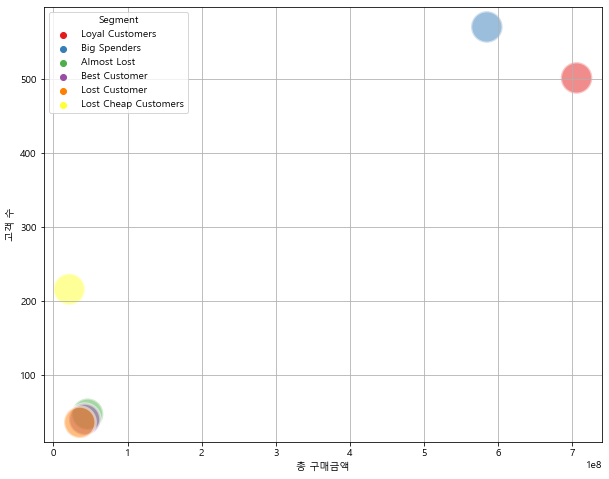

In [49]:
colors_seg = matplotlib.cm.get_cmap('Set1')(np.arange(len(sq1)))

plt.figure(figsize=(10,8))
sns.scatterplot(x="구매금액", 
                y='ID',
                s=1000, alpha=0.5,
                hue="Segment",
                data=sq1.merge(sq2, on = 'Segment'), palette = colors_seg)
plt.xlabel("총 구매금액")
plt.ylabel("고객 수")
plt.grid(True)
plt.show()

**RFM 분석 결과**
1. RFM 지수가 높으며 총구매금액이 높고, 고객 수도 많은 `Loyal Customers` & `Big Spenders` 주고객층으로 설정
2. RFM 지수 낮으며 총구매금액이 낮고, 고객 수도 적은 `Almost Lost` & `Lost Customer` 이탈고객으로 설정

In [50]:
pd.DataFrame({customers:
              md[md['Segment'] == customers].상품중분류명.value_counts().head(5).index for customers in sq1.Segment.unique()})

,Loyal Customers,Big Spenders,Almost Lost,Best Customer,Lost Customer,Lost Cheap Customers
0,여성용의류-SPA,여성용의류-SPA,여성용의류-SPA,주방가전,스포츠용품/의류,여성용의류-SPA
1,주방가전,스포츠용품/의류,스포츠용품/의류,여성용의류-SPA,여성용의류-SPA,주방가전
2,스포츠용품/의류,주방가전,주방가전,생활가전,생활가전,스포츠용품/의류
3,생활가전,화장품,남성용의류-캐주얼,구두,여성용의류-정장류,화장품
4,화장품,여성용의류-정장류,구두,스포츠용품/의류,주방가전,생활가전


<font color=gold>↓ [PPT page.10]</font>

## 3-2. 의류잡화

- 총 구매금액이 가장 높게 나타나는 `의류잡화`에 초점

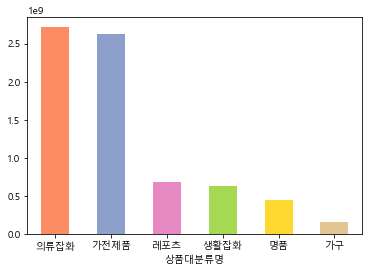

In [51]:
nofood.groupby('상품대분류명')['구매금액'].sum().sort_values(ascending = False).plot.bar(color = colors_items[1:])
plt.xticks(rotation = 0)
plt.show()

<font color=gold>↓ [PPT page.11]</font>

### 3-2-1. 주얼리

- 의류잡화 중 금액대가 높은 `주얼리`에 대한 분석 진행

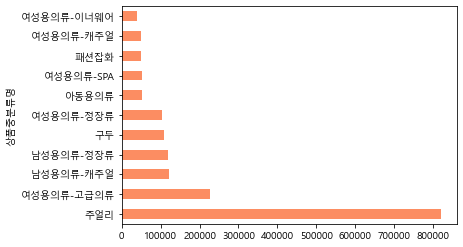

In [52]:
nofood[nofood['상품대분류명'] == '의류잡화'].groupby('상품중분류명')['구매금액'].mean().sort_values(ascending = False).plot.barh(color = colors_items[1])
plt.show()

In [53]:
# 해당 상품군 데이터 추출
jewelry = nofood[nofood['상품중분류명'] == '주얼리']

# 전체 구매시간별 구매 비율
all_jewelry = jewelry['구매시간'].value_counts(normalize = True).sort_index().rename('전체')
all_jewelry

11    0.032787
12    0.049180
13    0.106557
14    0.245902
15    0.073770
16    0.204918
17    0.057377
18    0.106557
19    0.057377
20    0.065574
Name: 전체, dtype: float64

In [54]:
# 평일 구매시간별 구매 비율
weekday_jewelry = jewelry[jewelry['평일주말'] == '평일']['구매시간'].value_counts(normalize = True).sort_index().rename('평일')
weekday_jewelry

11    0.0375
12    0.0125
13    0.0875
14    0.3500
15    0.0750
16    0.2625
17    0.0375
18    0.0625
19    0.0500
20    0.0250
Name: 평일, dtype: float64

In [55]:
# 주말 구매시간별 구매 비율
weekend_jewelry = jewelry[jewelry['평일주말'] == '주말']['구매시간'].value_counts(normalize = True).sort_index().rename('주말')
weekend_jewelry

11    0.023810
12    0.119048
13    0.142857
14    0.047619
15    0.071429
16    0.095238
17    0.095238
18    0.190476
19    0.071429
20    0.142857
Name: 주말, dtype: float64

In [56]:
# 데이터 합치기
time_jewerly = pd.concat([all_jewelry, weekday_jewelry, weekend_jewelry], axis = 1)
time_jewerly

,전체,평일,주말
11,0.032787,0.0375,0.023810
12,0.049180,0.0125,0.119048
13,0.106557,0.0875,0.142857
14,0.245902,0.3500,0.047619
15,0.073770,0.0750,0.071429
16,0.204918,0.2625,0.095238
17,0.057377,0.0375,0.095238
18,0.106557,0.0625,0.190476
19,0.057377,0.0500,0.071429
20,0.065574,0.0250,0.142857


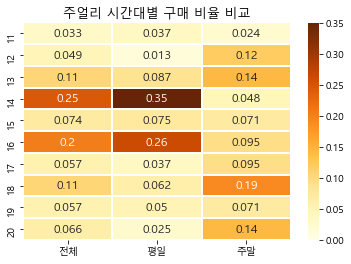

In [57]:
sns.heatmap(time_jewerly, cmap='YlOrBr', linewidths=1, vmin=0, annot=True, annot_kws={'size':12})
plt.title('주얼리 시간대별 구매 비율 비교', fontsize=13)
plt.show()

<font color=gold>↓ [PPT page.12]</font>

### 3-2-2. 캐주얼

**실버세대의 캐주얼에 대한 관심 증가**

- 백진엽, '응사' '꽃보다할배'의 경제효과는 얼마?, new1, https://www.news1.kr/articles/1505129

평균 연령 76세의 꽃할배 4인방의 파란만장 배낭여행기를 담은 '꽃보다 할배'는 `실버 세대가 즐길 수 있을만한 다양한 문화 공연 및 레저산업`이 활기를 띠게 되는 계기를 마련했다는 평가다. 아울러 젊은층이 즐겨찾는 `'이지캐주얼' 의류를 구매한 60대 이상 고객 매출도 동반상승, 실버 산업의 새로운 트렌드`를 이끌었다.

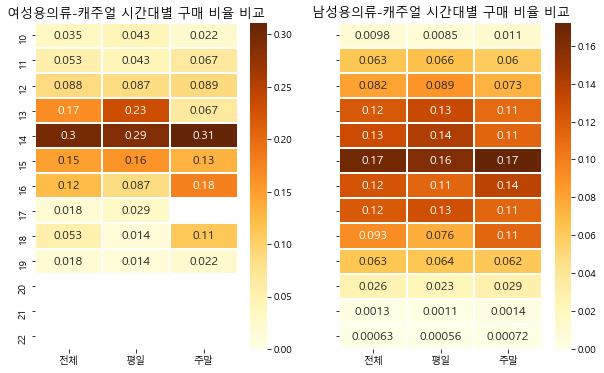

In [58]:
casuals = ['여성용의류-캐주얼', '남성용의류-캐주얼']

fig, axes = plt.subplots(1,2, figsize=(10,6), sharey=True)

# 주얼리의 과정 반복
for casual in casuals :
    item = nofood[nofood['상품중분류명'] == casual]
    all_item = item['구매시간'].value_counts(normalize = True).sort_index().rename('전체')
    weekday_item = item[item['평일주말'] == '평일']['구매시간'].value_counts(normalize = True).sort_index().rename('평일')
    weekend_item = item[item['평일주말'] == '주말']['구매시간'].value_counts(normalize = True).sort_index().rename('주말')
    time_item = pd.concat([all_item, weekday_item, weekend_item], axis = 1)
    sns.heatmap(time_item, cmap='YlOrBr', ax=axes[casuals.index(casual)], linewidths=1, vmin=0, annot=True, annot_kws={'size':12})
    axes[casuals.index(casual)].set_title(str(casual)+' 시간대별 구매 비율 비교', fontsize=13)

plt.show()

<font color=gold>↓ [PPT page.14]</font>

## 3-3. 가전제품

- 다른 제품군과 다르게 계절별 구매수량 편차가 큰 `가전제품`에 대한 분석 진행

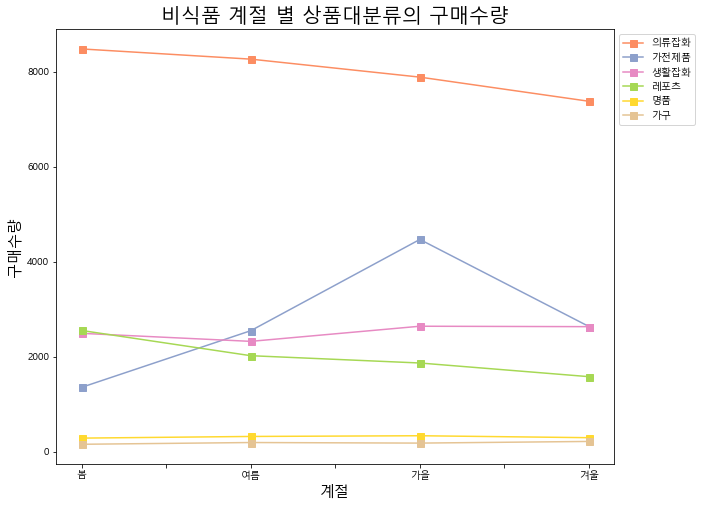

In [59]:
fig, ax = plt.subplots(figsize=(10,8))

for i in list(df.상품대분류명.value_counts().index[1:]):
    nofood.query('상품대분류명==@i').구매계절\
    .value_counts()[['봄','여름','가을','겨울']].plot(label=i, marker='s', markersize=7, color = colors_items[list(df.상품대분류명.value_counts().index[1:]).index(i)+1])

ax.set_xlabel('계절', size=15)
ax.set_ylabel('구매수량', size=15)
    
plt.title('비식품 계절 별 상품대분류의 구매수량', size=20)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [60]:
# 가장 적은 봄과 가장 많은 가을 3.3배 차이

nofood.query('상품대분류명=="가전제품"').구매계절\
.value_counts()[['봄','여름','가을','겨울']].max()/nofood.query('상품대분류명=="가전제품"').구매계절\
.value_counts()[['봄','여름','가을','겨울']].min()

3.3013293943870017

### 3-3-1. 결혼 시기와 연관
- 혼수 관련 제품

In [61]:
marriage = pd.read_excel('marriage.xlsx')
marriage = marriage.set_index('연도')
marriage

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
연도,,,,,,,,,,,,
04~'14년 평균,27.7,24.1,26.8,25.4,29.5,27.0,24.0,24.3,19.4,25.3,29.7,39.1
2013년,28.8,24.1,23.6,24.4,30.8,26.2,27.3,25.6,19.2,27.1,28.4,37.3
2014년,26.9,25.0,25.0,23.8,28.3,24.8,25.0,22.3,19.3,27.1,23.6,34.3


In [62]:
marriage = marriage.loc[:, '1월':'12월'].apply(lambda x : x*1000)
marriage[['봄', '여름', '가을', '겨울']] = 0
for i in marriage.columns[:-4] :
    marriage[season(int(i[:-1]))] += marriage[i]
marriage

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,봄,여름,가을,겨울
연도,,,,,,,,,,,,,,,,
04~'14년 평균,27700.0,24100.0,26800.0,25400.0,29500.0,27000.0,24000.0,24300.0,19400.0,25300.0,29700.0,39100.0,81700.0,75300.0,74400.0,90900.0
2013년,28800.0,24100.0,23600.0,24400.0,30800.0,26200.0,27300.0,25600.0,19200.0,27100.0,28400.0,37300.0,78800.0,79100.0,74700.0,90200.0
2014년,26900.0,25000.0,25000.0,23800.0,28300.0,24800.0,25000.0,22300.0,19300.0,27100.0,23600.0,34300.0,77100.0,72100.0,70000.0,86200.0


In [63]:
local_marriage = pd.read_csv('시도_시군구_월별_혼인_20210604161106.csv', encoding='cp949', engine='python')
local_marriage = local_marriage.set_index('시군구별')
local_marriage

,2014. 01,2014. 02,2014. 03,2014. 04,2014. 05,2014. 06,2014. 07,2014. 08,2014. 09,2014. 10,2014. 11,2014. 12
시군구별,,,,,,,,,,,,
서울특별시,5478,5138,5313,4840,6288,5299,5330,4951,4106,5554,4995,7531
부산광역시,1777,1523,1409,1431,1767,1603,1631,1331,1198,1700,1480,2077
경기도,6427,5985,6093,5857,6831,6096,6202,5367,4628,6559,5828,8433


In [64]:
local_marriage[['봄', '여름', '가을', '겨울']] = 0
for i in local_marriage.columns[:-4] :
    local_marriage[season(int(i[-2:]))] += local_marriage[i]
local_marriage

,2014. 01,2014. 02,2014. 03,2014. 04,2014. 05,2014. 06,2014. 07,2014. 08,2014. 09,2014. 10,2014. 11,2014. 12,봄,여름,가을,겨울
시군구별,,,,,,,,,,,,,,,,
서울특별시,5478,5138,5313,4840,6288,5299,5330,4951,4106,5554,4995,7531,16441,15580,14655,18147
부산광역시,1777,1523,1409,1431,1767,1603,1631,1331,1198,1700,1480,2077,4607,4565,4378,5377
경기도,6427,5985,6093,5857,6831,6096,6202,5367,4628,6559,5828,8433,18781,17665,17015,20845


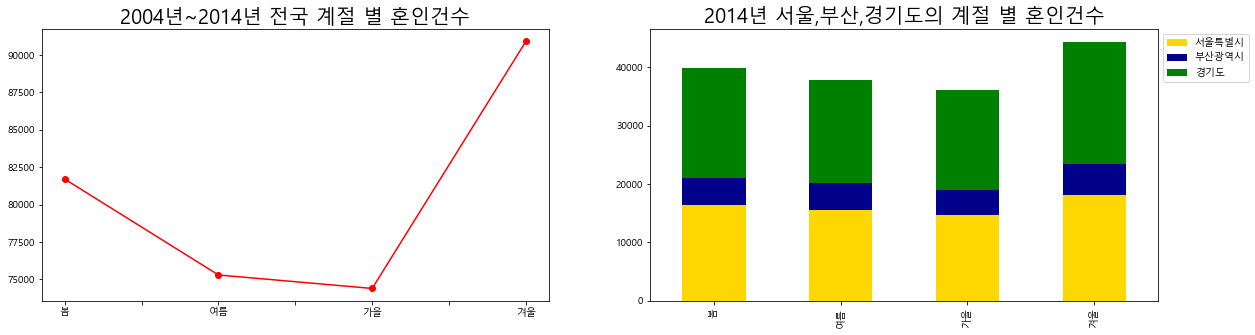

In [65]:
fig, axes = plt.subplots(1,2, figsize=(20,5))

xlabels = ['봄','여름','가을','겨울']

marriage.iloc[0, -4:].T.plot(ax = axes[0], color='red', marker='o')
axes[0].set_title('2004년~2014년 전국 계절 별 혼인건수', size = 20)

local_marriage.iloc[:, -4:].T.plot.bar(ax = axes[1], color=['gold','darkblue','green'], stacked=True)
axes[1].set_title('2014년 서울,부산,경기도의 계절 별 혼인건수', size = 20)
axes[1].legend(bbox_to_anchor=(1,1))

plt.show()

**분석 결과**
1. 가전제품 계절별 판매 비율을 볼 때, `가을 >겨울` > 여름 > 봄
2. 전국과 데이터에 반영된 지역(서울, 부산, 경기)의 계절별 혼인 건수를 볼 때, `겨울 > 봄` > 여름 > 가을

<font color=gold>↓ [PPT page.15]</font>

### 3-3-2. 가을 & 주방가전
- 계절 중 가장 많이 판매되는 `가을`에 초점
- 특히, 가전제품 중 높은 판매 비율을 갖는 `주방가전`

In [66]:
# 해당 상품군 데이터 추출
ele = nofood.query("상품대분류명 == '가전제품'")

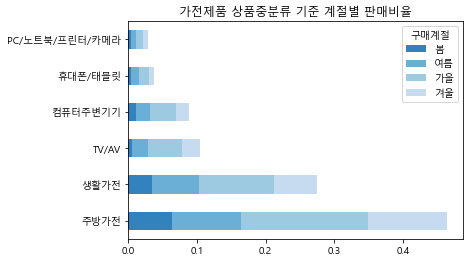

In [67]:
colors_season = matplotlib.cm.get_cmap('tab20c')(np.arange(4))

pd.crosstab(ele.상품중분류명, ele.구매계절, 
            normalize=True, margins=True)[['봄', '여름', '가을', '겨울']].reindex(ele.상품중분류명.value_counts().index).plot.barh(stacked = True, color = colors_season)
plt.title('가전제품 상품중분류 기준 계절별 판매비율')
plt.show()

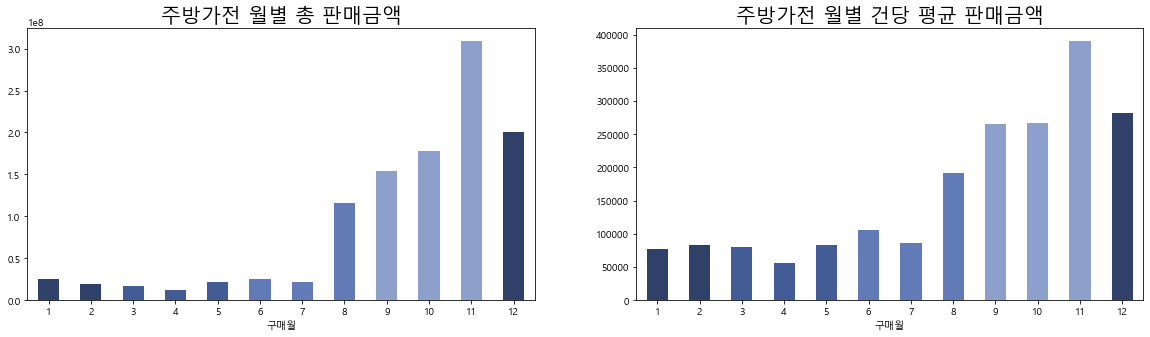

In [68]:
# 주방 가전 월별 판매 금액 비교
month = [i for i in range(1,13)]

colors_month = ['#304169', '#304169',
                '#445C95', '#445C95', '#445C95',
               '#627BB7', '#627BB7', '#627BB7',
               '#8DA0CB', '#8DA0CB', '#8DA0CB', '#304169']

fig, axes = plt.subplots(1,2, figsize=(20,5))

ele.query("상품중분류명 == '주방가전'").groupby('구매월')['구매금액'].sum().plot.bar(ax = axes[0], color = colors_month)
axes[0].set_title('주방가전 월별 총 판매금액', size = 20)
axes[0].set_xticklabels(month, rotation = 0)

ele.query("상품중분류명 == '주방가전'").groupby('구매월')['구매금액'].mean().plot.bar(ax = axes[1], color = colors_month)
axes[1].set_title('주방가전 월별 건당 평균 판매금액', size = 20)
axes[1].set_xticklabels(month, rotation = 0)

plt.show()

In [69]:
# 주방가전 11월 내역 중 금액 상위 10위
ele.query("상품중분류명 == '주방가전' and 구매월 == 11").sort_values(by = '구매금액', ascending = False)['구매금액'][:10].values

array([4431000, 4431000, 3419000, 3308000, 3197000, 3019000, 3019000,
       3002000, 2975000, 2735000], dtype=int64)

**분석 결과**
1. 매출이 좋은 가을 중 특히 가장 높은 매출을 보이는 `11월`
2. 11월에 판매된 상품 중 주방가전의 금액을 나열해보았을 때, 가격대를 보아 냉장고와 같은 상품이 많이 팔렸음을 추정